In [1]:
from mdf_forge import Forge
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw

sns.set_style("white")
sns.set_context("talk")
%matplotlib inline

# Define Helper Functions

In [2]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

def shape_data(res):
    features = []
    for r in res:
        feat = {}
        feat.update(r['projects']['verde'])
        feat.update(r['molecule'])
        features.append(flatten(feat))
    return pd.DataFrame(features)

# Perform a Search
* Match a specific source
* Match a range on two properties


In [4]:
mdf = Forge()

dataset_name = "abrehabiruk_virtual_db"
r = mdf.match_resource_types("record").match_source_names(dataset_name)
r = r.search()
df = shape_data(r)

In [5]:
df.head()

,dipole_moment_S0,homo,inchi_key,lumo,smiles,0_0_T1,dipole_moment_T1,ionization_potential,redox_potential_S0,redox_potential_T1,0_0_S1,dipole_moment_S1,redox_potential_S1,vertical_excitation_energy
0,6.94250,-5.565272,OFLYEHCQTBWENM-UHFFFAOYSA-N,-2.714064,N#Cc1ccc(nc1)c1ccc2c3c1ccc1c3c(cc2)c2c3c1ccc1c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.05310,-5.291798,HPBZGQTXBGDSSH-UHFFFAOYSA-N,-2.388887,Cc1ccc(n1C)c1ccc2c3c1ccc1c3c(cc2)c2c3c1ccc1c3c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.55058,-7.365033,HOPCHDDWOUAPGM-UHFFFAOYSA-N,-3.473805,N#Cc1cnc(o1)c1ccc2c(c1)C(=O)c1c(C2=O)ccc(c1)c1...,2.45,2.24088,8.54,2.49,0.04,NaN,NaN,NaN,NaN
3,0.66930,-5.972627,LAIDIDGTYFIZQQ-UHFFFAOYSA-N,-3.461016,Clc1nnc(nn1)c1cc2c3cc(c4nnc(nn4)Cl)c4c5c3c(c3c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.58562,-7.742455,XYYZHXPUWJXTKW-UHFFFAOYSA-N,-2.688213,O=Cn1c(ccc1[C@@]1(N=N1)C(F)(F)F)C(F)(F)F,2.68,9.22915,9.12,2.63,-0.05,2.94,4.58562,-0.31,2.54


In [6]:
df.describe()

,dipole_moment_S0,homo,lumo,0_0_T1,dipole_moment_T1,ionization_potential,redox_potential_S0,redox_potential_T1,0_0_S1,dipole_moment_S1,redox_potential_S1,vertical_excitation_energy
count,1117.000000,1117.000000,1117.000000,844.000000,849.000000,904.000000,814.000000,734.000000,558.000000,558.000000,476.000000,558.000000
mean,4.281714,-6.286894,-2.944796,1.388400,5.950330,7.365830,1.437088,0.099619,2.304194,3.640174,-0.577227,2.115520
std,3.699847,0.837165,0.429524,0.834673,4.359196,1.483308,1.144733,0.901219,0.453162,2.967400,0.961592,0.494939
min,0.000000,-9.727526,-4.493688,-0.320000,0.000000,-0.010000,-4.950000,-6.770000,1.280000,0.000000,-7.070000,0.630000
25%,1.582610,-6.837133,-3.228359,0.750000,2.659700,6.610000,0.880000,-0.300000,1.910000,1.684860,-0.820000,1.790000
50%,3.485640,-6.101337,-2.931483,1.255000,5.369940,7.270000,1.420000,0.090000,2.270000,3.114505,-0.520000,2.110000
75%,6.156600,-5.605545,-2.629436,2.130000,8.410340,8.170000,2.070000,0.607500,2.660000,4.792023,-0.190000,2.450000
max,19.429580,-4.931519,-1.869422,3.290000,23.867280,11.700000,4.840000,2.530000,3.870000,18.941360,1.640000,3.790000


# Inspect the Metadata for One Record

In [7]:
r[0]

{'files': [{'data_type': 'ASCII text',
   'filename': 'OFLYEHCQTBWENM-UHFFFAOYSA-N_T1_solv_freq.log',
   'globus': 'globus://82f1b5c6-6e9b-11e5-ba47-22000b92c6ec/verde/abrehabiruk_virtual_db_v1.1/verde_calcs.tar/OFLYEHCQTBWENM-UHFFFAOYSA-N/OFLYEHCQTBWENM-UHFFFAOYSA-N_T1_solv_freq.log',
   'length': 656796,
   'mime_type': 'text/plain',
   'sha512': '9c04d6e6bf06182d639eeeb3dd041ea6f6623d4da525e0549c1deaa83ac91f662da9aca8d26cf6d86f02d53fbf1267e4f3e0d1e20e2ee2ec4f6a399f5235c18f',
   'url': 'https://data.materialsdatafacility.org/verde/abrehabiruk_virtual_db_v1.1/verde_calcs.tar/OFLYEHCQTBWENM-UHFFFAOYSA-N/OFLYEHCQTBWENM-UHFFFAOYSA-N_T1_solv_freq.log'},
  {'data_type': 'ASCII text',
   'filename': 'OFLYEHCQTBWENM-UHFFFAOYSA-N_cat-rad_solv_freq.log',
   'globus': 'globus://82f1b5c6-6e9b-11e5-ba47-22000b92c6ec/verde/abrehabiruk_virtual_db_v1.1/verde_calcs.tar/OFLYEHCQTBWENM-UHFFFAOYSA-N/OFLYEHCQTBWENM-UHFFFAOYSA-N_cat-rad_solv_freq.log',
   'length': 660815,
   'mime_type': 'text/plain',
  

# VERDE-specific Metadata 

In [8]:
print(json.dumps(r[100]['projects']['verde'], indent=2))

{
  "0_0": {
    "T1": 0.22
  },
  "dipole_moment": {
    "S0": 5.35021,
    "T1": 5.1954
  }
}


# Information on the Molecule

In [9]:
print(json.dumps(r[100]['molecule'], indent=2))

{
  "homo": -5.220776,
  "inchi_key": "GYSCVFSEIABAAS-IAZLARGGSA-N",
  "lumo": -2.508073,
  "smiles": "F/C=C/O/C=C\\c1cc2c3cc(/C=C\\O/C=C/F)c4c5c3c(c3c2c2c1cccc2c(c3)/C=C\\O/C=C\\F)cc(c5ccc4)/C=C\\O/C=C/F"
}


# Display a chart of molecule properties

(5, 11)

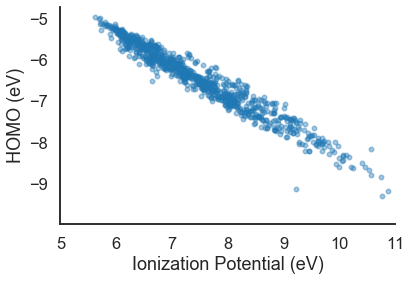

In [10]:
plt.scatter(df.ionization_potential, df.homo, s=20, alpha=0.4)
plt.xlabel("Ionization Potential (eV)")
plt.ylabel("HOMO (eV)")

sns.despine()

plt.xlim(5,11)

# Matching Ranges
Here we match records where the 8.5 < ionization_potential < 11.0

In [11]:
res = mdf.match_resource_types("record")
res = res.match_source_names("abrehabiruk_virtual_db")
res = res.match_range('projects.verde.ionization_potential', start=8.5, stop=11.0)
res = res.search()
len(res)

155

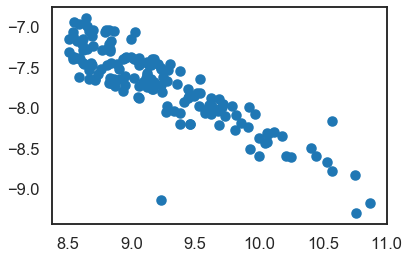

In [12]:
df = shape_data(res)
plt.scatter(df.ionization_potential, df.homo)

# Visualize some molecules

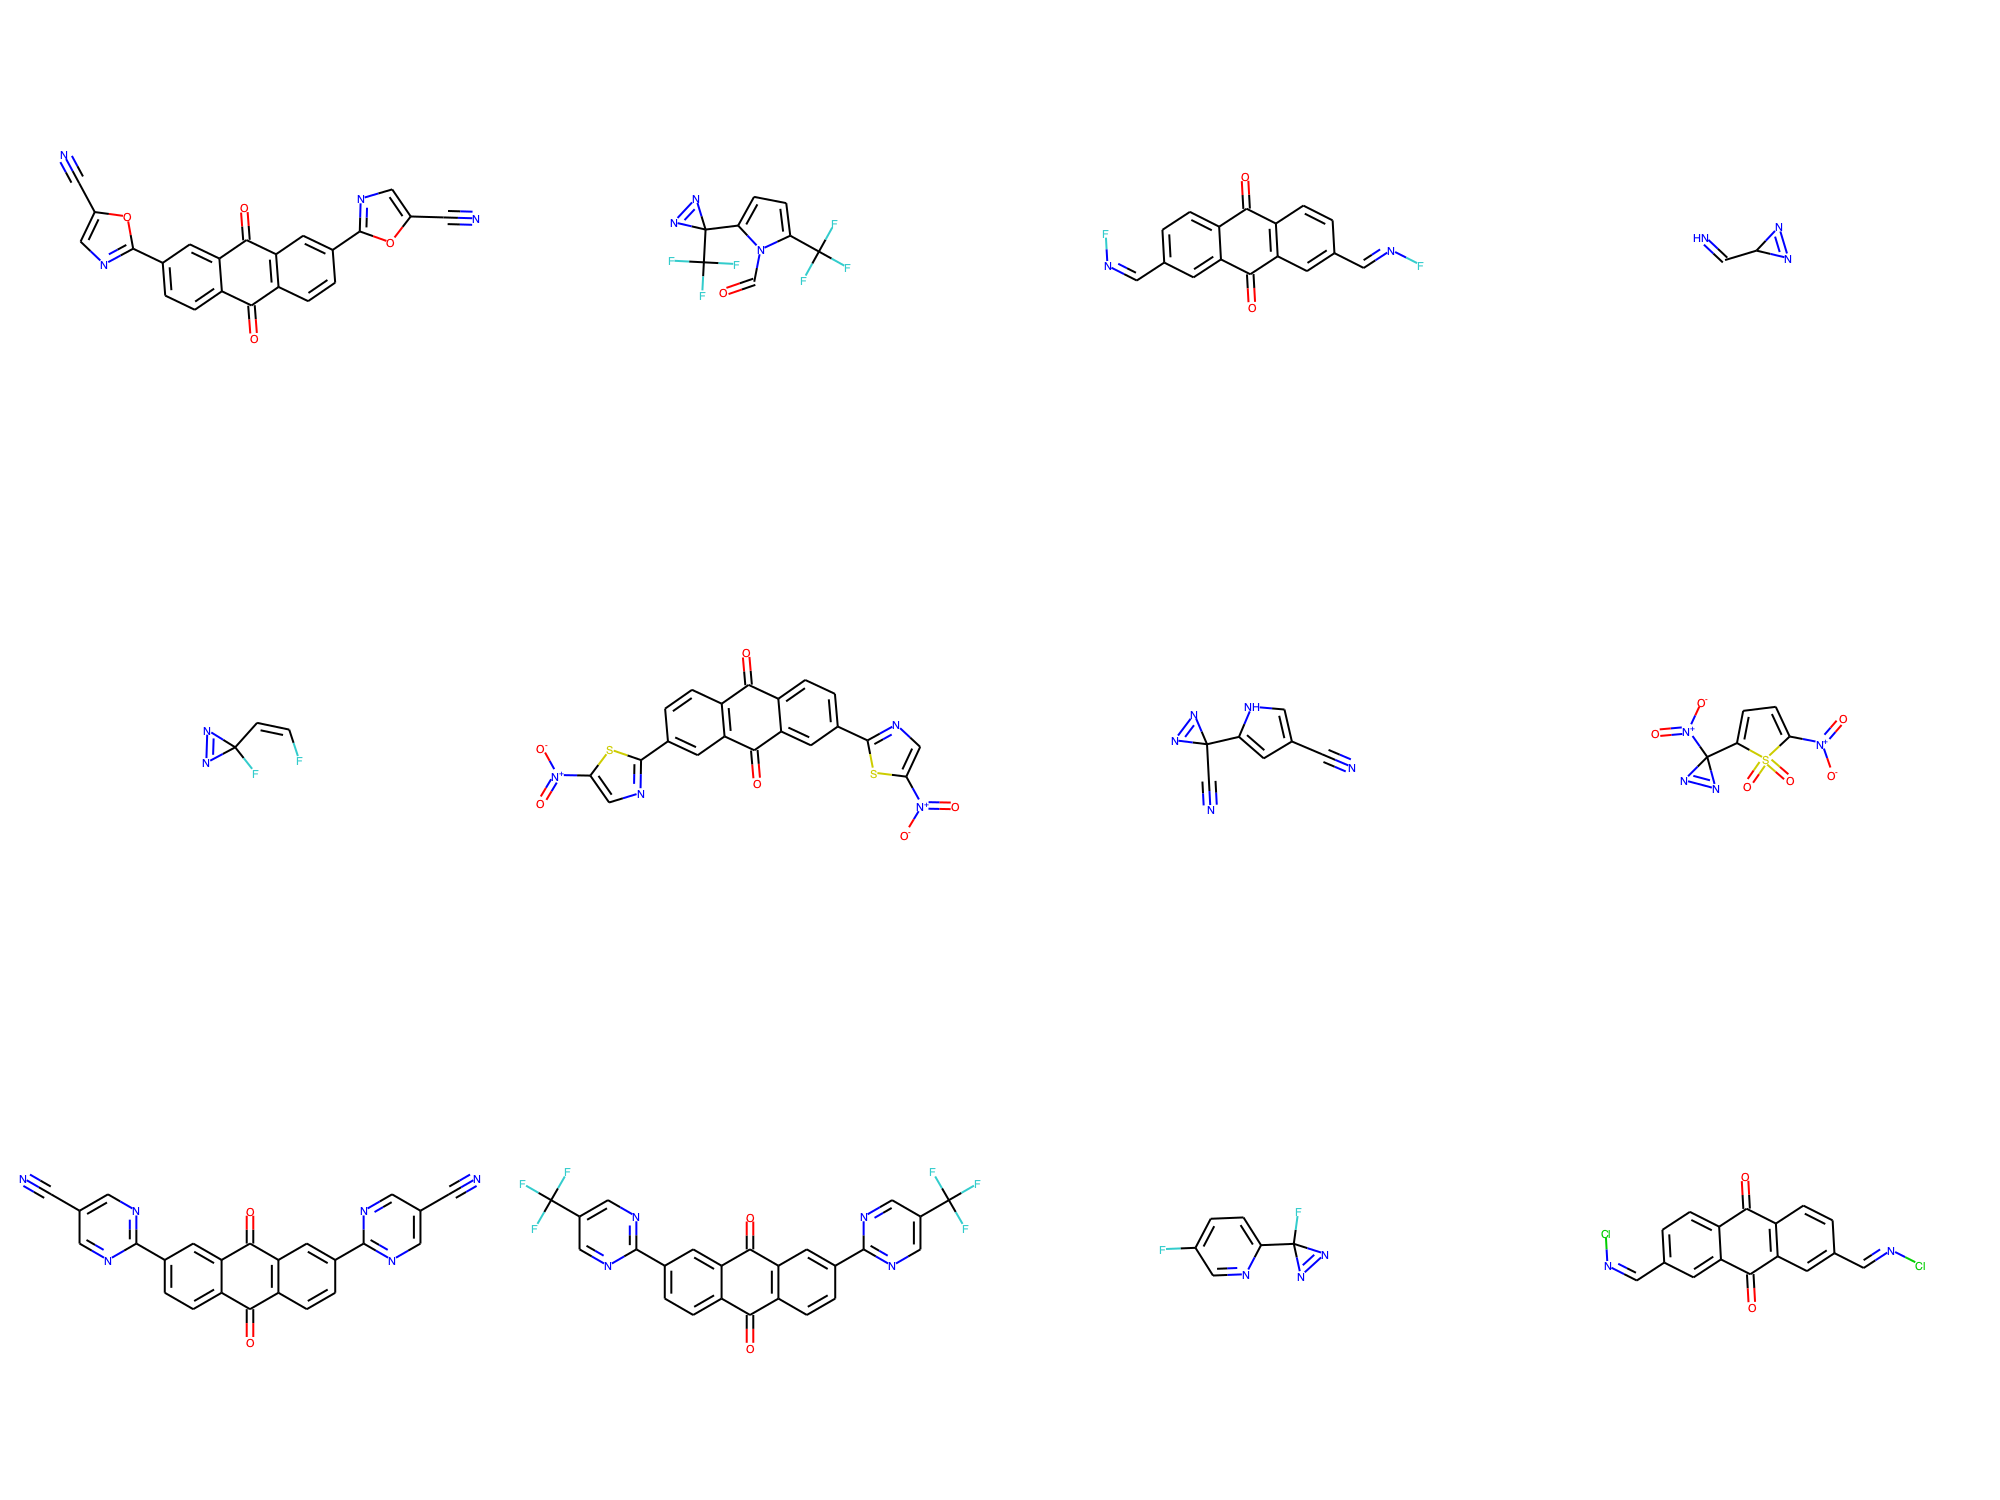

In [13]:
ms = [Chem.MolFromSmiles(sm) for sm in df['smiles'][0:12]]
Chem.Draw.MolsToGridImage(ms,molsPerRow=4, subImgSize=(500, 500), legends=None)

# Pull the Raw Calculations for analysis

In [14]:
res = mdf.match_resource_types("record")
res = res.match_source_names("abrehabiruk_virtual_db")
res = res.match_range('projects.verde.ionization_potential', start=10.0, stop=11.0)
res = res.search()
len(res)

18

In [ ]:
# NBVAL_SKIP
#dest_ep = "e38ee745-6d04-11e5-ba46-22000b92c6ec"
dest = "/Users/ben/Desktop/globus/verde"
status = mdf.globus_download(res, 
                             dest=dest,
                             preserve_dir=True)

In [ ]:
?mdf.globus_download

# OQMD Query

In [15]:
mdf = Forge()

dataset_name = "oqmd"
ro = mdf.match_resource_types("record").match_source_names(dataset_name)
ro = ro.search(limit=10)
print(json.dumps(ro[0], indent=2))

{
  "crystal_structure": {
    "number_of_atoms": 4,
    "space_group_number": 225,
    "volume": 57.6133
  },
  "dft": {
    "converged": true,
    "cutoff_energy": 252.3,
    "exchange_correlation_functional": "PBE"
  },
  "files": [
    {
      "data_type": "ASCII text, with very long lines, with no line terminators",
      "filename": "669718.json",
      "globus": "globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/669718.json",
      "length": 11068,
      "mime_type": "text/plain",
      "sha512": "f277519585643dd3a410225bd595ba5525803a96d8d23f3a29e15d88ae980a1219ef796b54b8a7f694eef13bb8c840a98d7617edea72e635bdc5b5995b621dbc",
      "url": "https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/669718.json"
    }
  ],
  "material": {
    "composition": "Be2Ir1Pa1",
    "elements": [
      "Be",
      "Ir",
      "Pa"
    ]
  },
  "mdf": {
    "ingest_date": "2018-11-09T19:44:43.687681Z",
    "resource_type": "re